# Проверка гипотез

In [26]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


Признаки
1. `Район` - район, в котором находится находится квартира
2. `Улица` - улица, на которой находится дом
3. `Станция метро` - ближайшая к дому станция метро
4. `Время до метро`, мин. - время до ближайшей станции метро
5. `Количество комнат` - количество комнат в квартире
6. `Общая площадь, м.кв.` - общая площадь квартиры
7. `Жилая площадь, м.кв.` - площадь жилых комнат квартиры
8. `Цена` - цена квартиры
9. `Год постройки` - год постройки дома
10. `Тип дома` - тип постройки дома
11. `Этаж` - этаж, на котором находится квартира
12. `Количество этажей в доме`- общее количество этажей в доме, в котором находится квартира
13. `Площадь кухни, м.кв`. - площадь помещения кухни
14. `Количество санузлов` - количество санузлов в кваптире
15. `Тип ремонта` - тип ремонта в квартире
16. `Количество подъездов в доме` - количество подъездов в доме

Мы будем проверять следующие гипотезы:
1. Самые дорогие квартиры находятся ближе к центру Москвы
2. Самые большие по площади квартиры находятся ближе к центру Москвы, а самые маленькие - ближе к окраинам
3. Чаще всего продают 3-комнатные квартиры
4. Доля квартир площадью менее 50 кв.м. больше доли квартир площадью больше 50 кв.м.
5. Самые большие квартиры были построены в 2000 - 2024гг.
6. Самые дорогие квартиры находятся в 5-10 мин. от метро
7. Самые дорогие квартиры были построены в 2000 - 2010гг.
8. Распределение общей площади квартир экспоненциальное
9. Количество подъездов незначительно влияет на другие показатели
10. В квартирах с общей площадью 100-150 кв.м в среднем больше санузлов, чем в квартирах с общей площадью 50-100 кв.м.

In [27]:
df = pd.read_csv('cian1.csv')
df

,Район,Улица,Станция метро,"Время до метро, мин.",Количество комнат,"Общая площадь, м.кв.","Жилая площадь, м.кв.",Цена,Год постройки,Тип дома,Этаж,Количество этажей в доме,"Площадь кухни, м.кв.",Количество санузлов,Тип ремонта,Количество подъездов в доме
0,Хамовники,ул. Ефремова,Фрунзенская,6,2,78.0,24,102999000.0,2003,Монолитно-кирпичный,7,12,10,2,Евроремонт,3
1,Пресненский,2-я Звенигородская ул.,Улица 1905 года,7,3,116.8,24,120000000.0,2023,NaN,5,21,10,2,Евроремонт,1
2,Пресненский,ул. Костикова,Улица 1905 года,9,2,51.0,24,52000000.0,2023,NaN,3,21,10,1,Евроремонт,3
3,Головинский,ул. Лавочкина,Водный стадион,4,2,44.0,27,10000000.0,1968,Панельный,8,9,7,1,Без ремонта,8
4,Мещанский,Рождественский бул.,Трубная,4,3,140.0,100,227576030.0,1903,Кирпичный,2,4,26,2,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,Лосиноостровский,Стартовая ул.,Медведково,3,3,65.6,41,17620000.0,1976,NaN,13,16,8,1,Косметический,1
1045,Донской,Варшавское ш.,Нагатинская,11,3,53.4,40,17550000.0,1962,Монолитный,8,8,5,1,Косметический,5
1046,Нижегородский,Рязанский просп.,Нижегородская,7,1,42.1,18,17700000.0,2003,NaN,18,25,12,1,Евроремонт,3
1047,Покровское-Стрешнево,Волоколамское ш.,Трикотажная,5,1,39.1,20,17700000.0,2003,NaN,21,29,12,1,Дизайнерский,3


## Гипотеза №1
Проверим гипотезу о том, что квартиры, расположенные ближе к центру города стоят дороже.
$$ H_0: \mu_{center} = \mu_{not center} $$
$$ H_1: \mu_{center} > \mu_{not center} $$
Где $\mu_{center}$ - мат. ожидание выборки цен квартир в районах Хамовники, Пресненский, Арбат, Замоскворечье, Тверской, Якиманка, Раменки, Таганский, а $\mu_{notcenter}$ - мат.ожидание выборки цен квартир в районах, расположенных дальше от центра.

Формула для рассчета z-статистики $$ \Z = \frac{{\bar{X}_1 - \bar{X}_2}}{\sqrt{\frac{\sigma_1^2}{n_1}  + \frac{\sigma_2^2}{n_2}}} $$



Разделим датафрейм df на два: dfc(квартиры в центральных районах) и dfnc(остальные квартиры), посчитаем для них средние значения и среднеквадратичесиее отклонения показателя Цена, найдем количество наблюдений в датафреймах, рассчитаем z-статистику и критическое значение для уровня значимости 0.05, сравним их:

In [28]:
dc = ['Хамовники', 'Пресненский', 'Арбат', 'Замоскворечье', 'Тверской', 'Якиманка', 'Раменки', 'Таганский']
dfc = df[df['Район'].isin(dc)]
dfnc = df[~df['Район'].isin(dc)]
mean1 = dfc['Цена'].mean()
mean2 = dfnc['Цена'].mean()
std1 = dfc['Цена'].std()
std2 = dfnc['Цена'].std()
n1 = dfc.shape[0]
n2 = dfnc.shape[0]
z_stat = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))
z_crit = stats.norm.ppf(0.95)
z_stat, z_crit

(20.05174125801305, 1.644853626951472)

Значение `z_stat` больше `z_crit`, следовательно, гипотеза H0 отвергается на уровне значимости 0.05. Значит, наша гипотеза о том, что квартиры, расположенные ближе к центру города, стоят дороже, не отвергается.

## Гипотеза №2
 Проверим гипотезу о том, что самые большие по площади квартиры находятся ближе к центру Москвы, а самые маленькие - ближе к окраинам
$$ H_0: \mu_{center} = \mu_{edge} $$
$$ H_1: \mu_{center} > \mu_{edge} $$
Где $\mu_{center}$ - мат. ожидание общей площади квартир в центральных районах, а $\mu_{edge}$ - мат. ожидание общей площади квартир в районах Черемушки, Печатнкии, Лосиноостровский, Новогиреево, Сокольники, Преображенское, Свиблово, Ясенево, Гольяново.

Формула для рассчета z-статистики $$ \Z = \frac{{\bar{X}_1 - \bar{X}_2}}{\sqrt{\frac{\sigma_1^2}{n_1}  + \frac{\sigma_2^2}{n_2}}} $$

Создадим датафрейм dfe, в котором будут квартиры из районов Черемушки, Печатнкии, Лосиноостровский, Новогиреево, Сокольники, Преображенское, Свиблово, Ясенево, Гольяново, в качестве второго датафрейма будем использовать dfс, созданный при проверке гипотезы 1. Посчитаем для них средние значения и среднеквадратичесиее отклонения показателя Общая площадь, м.кв. найдем количество наблюдений в датафреймах, рассчитаем z-статистику и критическое значение для уровня значимости 0.05, сравним их:

In [29]:
de = ['Черемушки', 'Печатники', 'Лосиноостровский', 'Новогиреево', 'Сокольники', 'Преображенское', 'Свиблово', 'Ясенево', 'Гольяново']
dfe = df[df['Район'].isin(de)]
mean1 = dfc['Общая площадь, м.кв.'].mean()
mean2 = dfe['Общая площадь, м.кв.'].mean()
std1 = dfc['Общая площадь, м.кв.'].std()
std2 = dfe['Общая площадь, м.кв.'].std()
n1 = dfc.shape[0]
n2 = dfe.shape[0]
z_stat = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))
z_crit = stats.norm.ppf(0.95)
z_stat, z_crit

(18.06158699723344, 1.644853626951472)

Значение `z_stat` больше `z_crit`, следовательно, гипотеза H0 отвергается на уровне значимости 0.05. Значит, наша гипотеза о том, что самые большие по площади квартиры находятся ближе к центру Москвы, а самые маленькие - ближе к окраинам, подтверждается.

## Гипотеза №3
Проверим гипотезу о том, что чаще всего продают 3-комнатные квартиры. Для этого проведем z-тест для сравнения долей сначала 3-комнатных и 2-комнатных квартир.

3.1 
$$ H_0: p_3 = p_2 $$ 
$$ H_1: p_3 > p_2 $$ 
Где $p_3$ - доля 3-комнатных квартир, а $p_2$ - доля 2-комнатных квартир.

Формула для рассчета z-статистики $$\Z = \frac{p_1 - p_2}{\sqrt{p(1-p)\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}$$

Рассчитаем `z_stat` и `z_crit`

In [30]:
three_rooms = df[df['Количество комнат'] == 3].shape[0]
two_rooms = df[df['Количество комнат'] == 2].shape[0]
all= two_rooms + three_rooms
p1 = three_rooms/all
p2 = two_rooms/all
p = (three_rooms + two_rooms ) / (2 * all)
z_stat = (p1 - p2) / ((p* (1 - p) * ((1 / three_rooms)+ (1/two_rooms))) ** 0.5)
z_crit = stats.norm.ppf(0.95)
z_stat, z_crit

(3.7386685255760677, 1.644853626951472)

Видим, что `z_stat` больше  `z_crit`, поэтому отвергаем гипотезу H0 о равенстве долей 3-комнатных и 2-комнатных квартир в пользу гипотезу Н1 о том, что доля трехкомнатных квартир больше доли 2-комнатных.

Проверим то же самое для доли 3-комнатных и доли 1-комнатных квартир:

3.2
$$ H_0: p_3 = p_1 $$ 
   $$ H_1: p_3 > p_1 $$ 

Формула для рассчета z-статистики $$\Z = \frac{p_1 - p_2}{\sqrt{p(1-p)\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}$$

In [31]:
one_room = df[df['Количество комнат'] == 1].shape[0]
all = one_room + three_rooms
p1 = three_rooms/all
p2 = one_room/all
p = (three_rooms + one_room ) / (2 * all)
z_stat = (p1 - p2) / ((p* (1 - p) * ((1 / three_rooms)+ (1/one_room))) ** 0.5)
z_crit = stats.norm.ppf(0.95)
z_stat, z_crit

(8.397978094244436, 1.644853626951472)

Также видим, что `z_stat` больше  `z_crit`, поэтому гипотеза Н0 о равенстве долей 3-комнатных и 1-комнатных квартир отвергается, следовательно, наша гипотеза H1 не отвергается.

Таким обрзаом, по результатов двух тестов отвергаем гипотезы о равенстве долей 3-комнатных и 2-комнатных, 3-комнатных и 1-комнатных квартир; наша гипотеза о том, что чаще всего продают 3-комнатные квартиры подтверждается.

## Гипотеза №4
Проверим, что доля квартир площадью менее 50 кв.м. больше доли квартир площадью больше 50 кв.м.
$$
\begin{aligned}
& H_0: p_{<50} = p_{>50} \\
& H_1: p_{<50} > p_{>50}
\end{aligned}
$$
Где $p_{<50}$ - доля квартир площадью менее 50 кв.м., $p_{>50}$ - доля кввртир площадью более 50 кв.м.
Используем ту же формулу, что и для проверки прошлой гипотезы.

Формула для рассчета z-статистики $$\Z = \frac{p_1 - p_2}{\sqrt{p(1-p)\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}$$

​​

In [32]:
total = df.shape[0]
less =df[df['Общая площадь, м.кв.'] < 50].shape[0]
more = df[df['Общая площадь, м.кв.'] > 50].shape[0]
p1 = less/total
p2 = more/total
p = (less + more) / (2 * total)
z_stat = (p1 - p2) / ((p* (1 - p) * ((1/less) + (1/more))) ** 0.5)
z_crit = stats.norm.ppf(0.95)
abs(z_stat), z_crit

(10.181069665560301, 1.644853626951472)

Видим, что `z_stat` больше по модулю, чем  `z_crit`, поэтому гипотеза Н0 о равенстве долей квартир площадью менее 50 кв.м. и площадью больше 50 кв.м. отвергается. Значит, наша гипотеза о том, что доля квартир площадью менее 50 кв.м. больше доли квартир площадью больше 50 кв.м. подтверждается.

## Гипотеза №5
Проверим, действительно ли самые большие квартиры были построены в 2000 - 2024гг.
$$
\begin{aligned}
& H_0: \mu_{early} = \mu_{late} \\
& H_1: \mu_{early} > \mu_{late}
\end{aligned}
$$
Где $\mu_{early}$ - мат. ожидание общей площади квартир, построенных до 2000 года, $\mu_{late}$- мат. ожидание общей площади квартир, построенных после 2000 года.

Формула для рассчета z-статистики $$ \Z = \frac{{\bar{X}_1 - \bar{X}_2}}{\sqrt{\frac{\sigma_1^2}{n_1}  + \frac{\sigma_2^2}{n_2}}} $$

Разделим датасет на два по признаку года постройки дома, они будут содержать только информацию об общей площади квартир, найдем для них средние значения, стандартные отклонения, длину выборок, воспользуемся формулой и найдем `z_stat` и `z_crit`:

In [33]:
g1= df[(df['Год постройки'] >= 2000) & (df['Год постройки'] <= 2024)]['Общая площадь, м.кв.']
g2 = df[(df['Год постройки'] < 2000) | (df['Год постройки'] > 2024)]['Общая площадь, м.кв.']
mean1 = g1.mean()
mean2 = g2.mean()
std1 = g1.std()
std2 = g2.std()
n1 = g1.shape[0]
n2 = g2.shape[0]
z_stat = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))
z_crit = stats.norm.ppf(0.95)
z_stat, z_crit

(12.246084868744123, 1.644853626951472)

`z_stat` больше, чем `z_crit`, поэтому мы отвергаем гипотезу H0 о равенстве мат. ожиданий, наша альтернативная гипотеза о том, что самые большие квартиры были построены в 2000 - 2024гг подтверждается.

## Гипотеза №6
Проверим гипотезу о том, что самые дорогие квартиры находятся в 5-10 мин. от метро.
$$
\begin{aligned}
& H_0: \mu_{5-10 min} = \mu_{other time} \\
& H_1: \mu_{5-10 min} > \mu_{other time}
\end{aligned}
$$
Где $\mu_{5-10 min}$ - мат. ожидание цен квартир, находящихся в 5-10 минутах от метро, $\mu_{other time}$ - мат. ожидание цен квартир, находящихся в менее или более 5-10 минут от метро.

Формула для рассчета z-статистики $$ \Z = \frac{{\bar{X}_1 - \bar{X}_2}}{\sqrt{\frac{\sigma_1^2}{n_1}  + \frac{\sigma_2^2}{n_2}}} $$

In [34]:
g1= df[(df['Время до метро, мин.'] >= 5) & (df['Время до метро, мин.'] <= 10)]['Цена']
g2 = df[(df['Время до метро, мин.'] < 5) | (df['Время до метро, мин.'] > 10)]['Цена']
mean1 = g1.mean()
mean2 = g2.mean()
std1 = g1.std()
std2 = g2.std()
n1 = g1.shape[0]
n2 = g2.shape[0]
z_stat = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))
z_crit = stats.norm.ppf(0.95)
z_stat, z_crit

(7.299500485491257, 1.644853626951472)

`z_stat` больше, чем `z_crit`. Отвергаем нулевую гипотезу о равенстве мат. ожиданий цен в пользу альтернативной о том, что самые дорогие квартиры находятся в 5-10 мин. от метро.
$$

## Гипотеза №7
Проверим гипотезу о том, что самые дорогие квартиры были построены в 2000 - 2010гг.
$$
\begin{aligned}
& H_0: \mu_{2000-2010} = \mu_{other years} \\
& H_1: \mu_{2000-2010} > \mu_{other years}
\end{aligned}
$$
Где $\mu_{2000-2010}$ - мат. ожидание цен квартир, построенных в 2000-2010гг., $\mu_{other years}$ - мат. ожидание цен квартир, построенных в другие годы.
Формула для рассчета z-статистики $$ \Z = \frac{{\bar{X}_1 - \bar{X}_2}}{\sqrt{\frac{\sigma_1^2}{n_1}  + \frac{\sigma_2^2}{n_2}}} $$


In [35]:
g1= df[(df['Год постройки'] >= 2000) & (df['Год постройки'] <= 2010)]['Цена']
g2 = df[(df['Год постройки'] < 2000) | (df['Год постройки'] > 2010)]['Цена']
mean1 = g1.mean()
mean2 = g2.mean()
std1 = g1.std()
std2 = g2.std()
n1 = g1.shape[0]
n2 = g2.shape[0]
z_stat = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))
z_crit = stats.norm.ppf(0.95)
z_stat, z_crit

(7.529904500390298, 1.644853626951472)

`z_stat` больше, чем `z_crit`. Отвергаем гипотезу H0 о равенстве мат. ожиданий цен, альтернативная гипотеза о том что самые дорогие квартиры были построены в 2000 - 2010гг., подтверждается.

## Гипотеза №8
На этапе визуализаций мы заметили, что распределение общей площади квартир напоминает экспоненциальное.
Проверим гипотезу о том, что распределение общей площади квартир экспоненциальное.

$$
\begin{aligned} 
&H_0: \hspace{1mm} \text{Общая площадь квартир распределена экспоненциально} \hspace{1mm} \\
&H_1: \hspace{1mm} \text{Общая площадь квартир распределена не экспоненциально} \hspace{1mm}
\end{aligned}
$$
Построим график с эмпирическим и теоретическим распределением, сравним их.

In [36]:
data = df['Общая площадь, м.кв.']
l = 1 / np.mean(data)

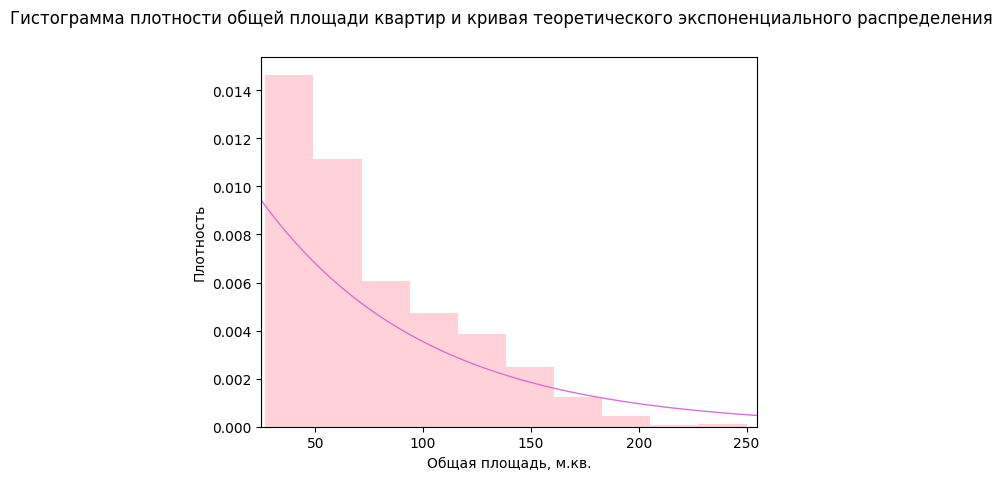

In [37]:
xmin, xmax = plt.xlim(25, 255)
x = np.linspace(xmin, xmax, 100)
p = l * np.exp(-l * x)
plt.plot(x, p, linewidth=1, color = 'orchid')
plt.hist(df['Общая площадь, м.кв.'], density=True, alpha=0.7, color='pink')

plt.suptitle('Гистограмма плотности общей площади квартир и кривая теоретического экспоненциального распределения')
plt.xlabel('Общая площадь, м.кв.')
plt.ylabel('Плотность')
plt.show()

Из графика видим, что они не совсем совпадают, вероятно, наша гипотеза H0 отвергается. Для того, чтобы убедиться в этом используем тест Колмогорова-Смирнова, который проверяет гипотезу о принадлежности выборки некоторому закону распределения, то есть проверки того, что эмпирическое распределение соответствует предполагаемой модели. 

In [38]:
stats.kstest(data, 'expon',args=(25, 1/l))

KstestResult(statistic=0.13377669400116188, pvalue=7.833829295666129e-17, statistic_location=154.2, statistic_sign=1)

В результате теста получаем p-value < 0.05, значит, наша гипотеза H0 о принадлежности выборки общей площади квартир экспоненциальному распределению отвергается на уровне значимости 5%.

## Гипотеза №9
На этапе EDA и визуализации мы заметили, что у признака Количество подъездов в доме самые незначительные коэффициенты корреляции с другими признаками. Проверим гипотезу о том, что количество подъездов незначительно влияет на другие показатели.
$$
\begin{aligned} 
&H_0: \hspace{1mm} \text{Количество подъездов незначительно влияет на другие показатели} \hspace{1mm} \\
&H_1: \hspace{1mm} \text{Количество подъездов значительно влияет на другие показатели} \hspace{1mm}
\end{aligned}
$$
Выведем коэффициенты корреляции признака Количество подъездов в доме с пятью другими признаками.

С ценой квартиры:

In [39]:
df['Количество подъездов в доме'].corr(df['Цена'])

-0.020736662888323158

С количеством комнат в квартире:

In [40]:
df['Количество подъездов в доме'].corr(df['Количество комнат'])

0.0446606233466829

С общей площадью квартиры:

In [41]:
df['Количество подъездов в доме'].corr(df['Общая площадь, м.кв.'])

-0.0008120503324317784

С годом постройки дома:

In [42]:
df['Количество подъездов в доме'].corr(df['Год постройки'])

0.02477358230694206

С временем до метро:

In [43]:
df['Количество подъездов в доме'].corr(df['Время до метро, мин.'])

0.04069539891662144

Видим, что они действительно между признаком Количество подъездов в доме и другими очень слабая корреляциия(практически ее отсутствие). Чтобы убедиться в этом, обучим модель линейной регрессии, узнаем коэффициенты признака Количество подъездов в доме при разных целевых переменных.

In [44]:
X= df['Количество подъездов в доме'].values.reshape(-1, 1)
y = df['Цена'].values.reshape(-1, 1)
m = LinearRegression()
lr = m.fit(X, y)
m.coef_

array([[-464599.06331864]])

In [45]:
y = df['Количество комнат'].values.reshape(-1, 1)
lr = m.fit(X, y)
m.coef_

array([[0.01068955]])

In [46]:
y = df['Общая площадь, м.кв.'].values.reshape(-1, 1)
lr = m.fit(X, y)
m.coef_

array([[-0.0100159]])

In [47]:
y = df['Год постройки'].values.reshape(-1, 1)
lr = m.fit(X, y)
m.coef_

array([[0.22230209]])

In [48]:
y = df['Время до метро, мин.'].values.reshape(-1, 1)
lr = m.fit(X, y)
m.coef_

array([[0.05519873]])

Видим, что значение коэффициента переменной Количество подъездов в доме  при целевой переменной Цена очень большое(по модулю), в то время как при других целевых переменных оно незначительно. Так как модель линейной регрессии обнаружила сильную связь между ценой квартиры и количеством подъездов, отвергаем выдвинутую нами гипотезу H0.

## Гипотеза №10
Проверим гипотезу о том, что в  квартирах с общей площадью 100-150 кв.м в среднем больше санузлов, чем в квартирах с общей площадью 50-100 кв.м.
$$
\begin{aligned}
& H_0: \mu_{50-100} = \mu_{100-150} \\
& H_1: \mu_{50-100} < \mu_{100-150}
\end{aligned}
$$
Где $\mu_{50-100}$ - мат. ожидание количества санузлов в квартирах площадью 50-150 кв.м, $\mu_{100-150}$ - мат. ожидание количества санузлов в квартирах площадью 100-150 кв.м.

Формула для рассчета z-статистики $$ \Z = \frac{{\bar{X}_1 - \bar{X}_2}}{\sqrt{\frac{\sigma_1^2}{n_1}  + \frac{\sigma_2^2}{n_2}}} $$


In [49]:
g1 = df[(df['Общая площадь, м.кв.'] >= 50) & (df['Общая площадь, м.кв.'] <= 100)]['Количество санузлов']
g2 = df[(df['Общая площадь, м.кв.'] > 100) & (df['Общая площадь, м.кв.'] <= 150)]['Количество санузлов']
mean1 = g1.mean()
mean2 = g2.mean()
std1 = g1.std()
std2 = g2.std()
n1 = g1.shape[0]
n2 = g2.shape[0]
z_stat = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))
z_crit = stats.norm.ppf(0.95)
abs(z_stat), z_crit 

(14.379782192262818, 1.644853626951472)

`z_stat` по модулю больше, чем `z_crit`, значит, наша гипотеза H1 верна, а нулевая о равенстве мат. ожиданий отвергается.

## Заключение
В результате проверки гипотез, мы убедились в том, что верны все гипотезы, кроме гипотез №8 и №9.